In [1]:
# https://setosa.io/ev/image-kernels/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Conv1D,Dropout,Activation,MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=5000)

X_train=sequence.pad_sequences(X_train,maxlen=500)
X_test=sequence.pad_sequences(X_test,maxlen=500)


17473536/17464789 [==============================] - 0s 0us/step


In [5]:
model=Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=4)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                      

In [6]:
history=model.fit(X_train,y_train,batch_size=40,epochs=100,validation_split=0.25,callbacks=[early_stopping_callback])

print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,y_test)[1]))

Epoch 1/100
469/469 [==============================] - 20s 13ms/step - loss: 0.3977 - accuracy: 0.8054 - val_loss: 0.2851 - val_accuracy: 0.8837
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.2313 - accuracy: 0.9085 - val_loss: 0.2637 - val_accuracy: 0.8918
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1834 - accuracy: 0.9308 - val_loss: 0.2954 - val_accuracy: 0.8842
Epoch 4/100
469/469 [==============================] - 5s 12ms/step - loss: 0.1500 - accuracy: 0.9446 - val_loss: 0.2973 - val_accuracy: 0.8835
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1138 - accuracy: 0.9591 - val_loss: 0.3102 - val_accuracy: 0.8789
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3435 - accuracy: 0.8772

 Test Accuracy: 0.8772


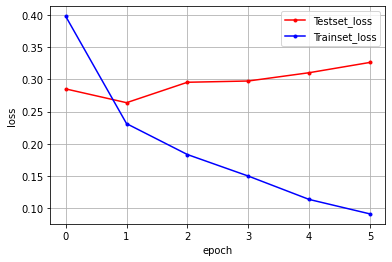

In [7]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()